# Lession 16 - Early Stopping MNIST

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
MNIST = np.load('../data/MNIST_train_1000.npz')
images = MNIST['train_images']
labels = MNIST['train_labels']
print(images.shape)
print(labels.shape)

(1000, 28, 28)
(1000,)


(b) Establish baseline accuracy rate.

In [68]:
tally = pd.Series(labels).value_counts()
acc_baseline = tally.max()/tally.sum()
print('baseline accuracy rate is ', acc_baseline)

baseline accuracy rate is  0.505


In [69]:
X = images.reshape(1000, 28*28)
P = pd.get_dummies(pd.DataFrame(labels, columns=['digit'], dtype='category')).values

In [70]:
epochs = 1000
model = Sequential()
model.add(Dense(2, input_shape=(28*28,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

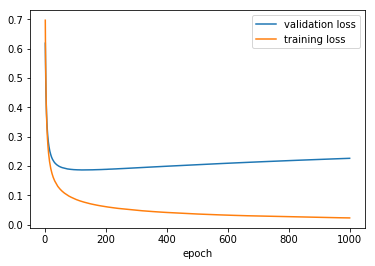

In [71]:
ax = results.plot.line(x='epoch', y='validation loss')
results.plot.line(x='epoch', y='training loss', ax=ax)

It's getting worse the more you train.  Use Early Stopping. Patience tells how many steps in the wrong direction
to go before quitting.

In [45]:
epochs = 1000
model = Sequential()
model.add(Dense(2, input_shape=(28*28,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0,
                 callbacks=[EarlyStopping(patience=0)])
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

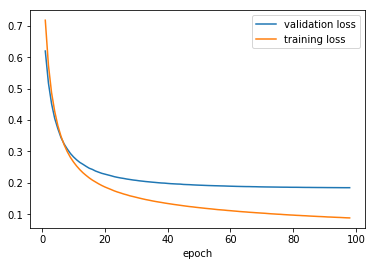

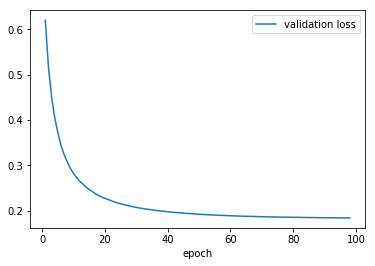

In [46]:
ax = results.plot.line(x='epoch', y='validation loss')
results.plot.line(x='epoch', y='training loss', ax=ax)

In [47]:
epochs = 100
model = Sequential()
model.add(Dense(32, input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0,
                 callbacks=[EarlyStopping(patience=10)])
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

(e) Design a "deep" network of multiple dense layers

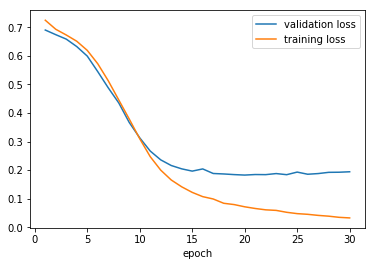

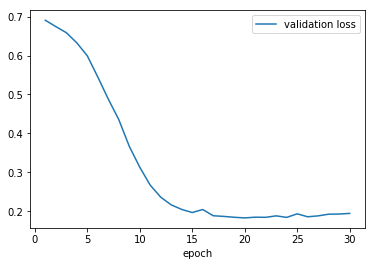

In [48]:
ax = results.plot.line(x='epoch', y='validation loss')
results.plot.line(x='epoch', y='training loss', ax=ax)
results.plot.line(x='epoch', y='validation loss')

(f) Load and preprocess the dataset MNIST_test_1000.npg.  Use model trained before
on test data.

In [80]:
MNISTtest = np.load('../data/MNIST_test_1000.npz')
images_test = MNISTtest['test_images']
labels_test = MNISTtest['test_labels']
print(images_test.shape)
print(labels_test.shape)

(1000, 28, 28)
(1000,)


In [85]:
X_test = images_test.reshape(1000, 28*28)
P_test  = pd.get_dummies(pd.DataFrame(labels_test, columns=['digit'], dtype='category')).values

In [86]:
Ph_test = model.predict(X_test)
ix_errors = (Ph_test.argmax(axis=1) != P_test.argmax(axis=1))
images_errors = images_test[ix_errors,:,:]
labels_errors = labels_test[ix_errors]
acc_test = 1 - len(images_errors)/len(images_test)
print('test accuracy rate =', acc_test)
print('number incorrect predictions', len(images_errors))

test accuracy rate = 0.957
number incorrect predictions 43


(1000,)

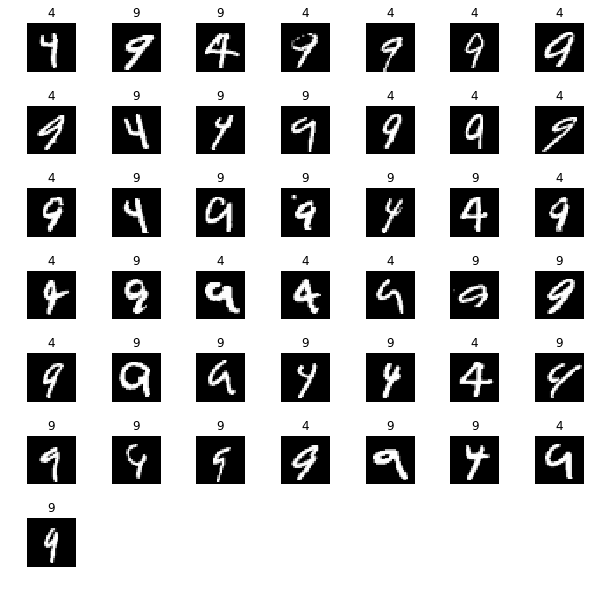

In [89]:
# image grid code
N = 7
M = 7
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(len(images_errors)):
    plt.subplot(M, N, i+1)
    plt.axis('off')
    plt.imshow(images_errors[i,:,:], cmap='Greys_r')
    plt.title(labels_test[i])
plt.show()

Human error rate is 1/10000.

In [97]:
Ph_test[1]

array([4.8708589e-05, 9.9995124e-01], dtype=float32)